In [ ]:
!pip install pandasql
!pip install geopandas
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install basemap-data-hires

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from datetime import datetime
import pandasql
import matplotlib.pyplot as plt 
import altair as alt
import folium
import geopandas as gpd

In [ ]:
# Os 4 primeiros dessa query são os estados que possuem maior frequência de ocorrências

count_ocorrencias_estado = pd.read_csv('todos_ovnis.csv')

q = """
SELECT COUNT(state), state FROM count_ocorrencias_estado GROUP BY state ORDER BY COUNT(state) DESC;
"""

pandasql.sqldf(q, locals())

,COUNT(state),State
0,11470,CA
1,5618,FL
2,4925,WA
3,4181,TX
4,3899,NY
...,...,...
81,1,South Carolina
82,1,Southern District
83,1,VI
84,1,"Washington, DC"


Definindo "shapes" por por cidades dos 4 "States" com mais ocorrências.

In [ ]:
shape = pd.read_csv('todos_ovnis.csv')

q = """
SELECT shape, state FROM shape WHERE state = "CA" OR state = "FL" OR state = "WA" OR state = "TX" ORDER BY state;
"""

df = pandasql.sqldf(q, locals())
count_shapes = df.groupby(['State','Shape']).size().reset_index(name='Count')

print(count_shapes)

   State     Shape  Count
0     CA  Changing    376
1     CA   Chevron    180
2     CA     Cigar    218
3     CA    Circle   1184
4     CA      Cone     51
..   ...       ...    ...
87    WA  Teardrop     34
88    WA  Triangle    404
89    WA   Unknown    407
90    WA     light      1
91    WA     other      1

[92 rows x 3 columns]


Plotando gráfico de barras agrupadas baseado na consulta anterior

In [ ]:
barras_agrupadas = alt.Chart(count_shapes).mark_bar().encode(
    alt.Column('State'), alt.X('Shape'),
    alt.Y('Count', axis=alt.Axis(grid=False)),
    alt.Color('Shape'))
  
barras_agrupadas.display()

alt.Chart(...)

In [ ]:
barras_empilhadas = alt.Chart(count_shapes).mark_bar().encode(
    alt.X('State'),
    alt.Y('Count', axis=alt.Axis(grid=False)),
    alt.Color('Shape')).properties(
    width={"step": 50},
)
  
barras_empilhadas.display()

alt.Chart(...)

Iniciando "folium.Map" a partir de Montana com o intuito de manter os EUA centralizado

In [ ]:
m = folium.Map(location=[40, -95], zoom_start=4)
m

Montando um gráfico de calor baseado nos locais dos EUA com maior quantidade de ocorrências a partir da biblioteca "Folium"



In [ ]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

cities = pd.read_csv('todos_ovnis.csv')

q = """
SELECT State, COUNT(State) as Count, Country FROM cities WHERE Country = 'USA' GROUP BY State HAVING COUNT(State) > 0 ORDER BY Count(State);
"""

df = pandasql.sqldf(q, locals())
merge = pd.merge(df, state_data, how = 'inner')
df_merge = df.drop_duplicates(subset='State')

df_merge

,State,Count,Country
0,AB,1,USA
1,BC,1,USA
2,NS,1,USA
3,Ontario,1,USA
4,South Carolina,1,USA
5,"Washington, DC",1,USA
6,ON,2,USA
7,DC,118,USA
8,ND,156,USA
9,SD,256,USA


In [ ]:
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_merge,
    columns=["State", "Count"],
    key_on="feature.id",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Count of cases",
).add_to(m)

folium.LayerControl().add_to(m)

m.save('.mapa_USA.html')
m

In [ ]:
m2 = folium.Map(location=[33, -103], zoom_start=4)
m2

In [ ]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
county_geo = f"{url}/us_counties_20m_topo.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

uscities = pd.read_csv('uscities.csv')

uscities_new = uscities.drop(['city_ascii', 'state_name', 'county_fips', 'county_name', 'population', 'density', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'], axis=1)

q = """
SELECT City, lat, lng FROM uscities_new WHERE state_id = 'CA' ORDER BY City;
"""

df_cities = pandasql.sqldf(q, locals())

df_cities_renamed = df_cities.rename(columns={'city': 'City'})

uscities = pd.read_csv('todos_ovnis.csv')

q = """
SELECT State, City, COUNT(City) as Count FROM uscities WHERE State = 'CA' GROUP BY City HAVING COUNT(City) > 0 ORDER BY COUNT(City) DESC;
"""

df = pandasql.sqldf(q, locals())
cities_merge = pd.merge(df_cities_renamed, df, how = 'inner')

cities_merge

,City,lat,lng,State,Count
0,Acampo,38.1735,-121.2797,CA,1
1,Acton,34.4956,-118.1858,CA,4
2,Adelanto,34.5814,-117.4397,CA,4
3,Agoura Hills,34.1510,-118.7609,CA,8
4,Agua Dulce,34.5044,-118.3160,CA,2
...,...,...,...,...,...
770,Yountville,38.3963,-122.3671,CA,4
771,Yreka,41.7291,-122.6312,CA,7
772,Yuba City,39.1357,-121.6383,CA,15
773,Yucaipa,34.0336,-117.0429,CA,20


In [ ]:
BBox = [cities_merge['lng'].min(), cities_merge['lng'].max(), cities_merge['lat'].min(), cities_merge['lat'].max()]
BBox

[-124.2612, -114.6189, 32.5693, 41.9533]

In [ ]:
ruh_m = pltimread('map.png')
ruh_m

array([[[1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ]],

       [[0.6392157 , 0.64705884, 0.6156863 , 1.        ],
        [0.6627451 , 0.654902  , 0.6392157 , 1.        ],
        [0.6627451 , 0.654902  , 0.6392157 , 1.        ],
        ...,
        [0.6627451 , 0.654902  , 0.6392157 , 1.        ],
        [0.6627451 , 0.654902  , 0.6392157 , 1.        ],
        [0.5176471 , 0.5137255 , 0.45490196, 1.        ]],

       [[0.827451  , 0.827451  , 0.8156863 , 1.        ],
        [0.8392157 , 0.8352941 , 0.827451  , 1.        ],
        [0.8392157 , 0.8352941 , 0.827451  , 1.        ],
        ...,
        [0.8392157 , 0.8352941 , 0.827451  , 1.        ],
        [0.8392157 , 0.835294

Onde na Califórnia está localizada a maior quantidade de visualizações de objetos voadores não identificados? Investigue e descreva a possível razão para esse local ter a maior quantidade de visualizações.

San Diego com 392 ocorrências. Essa quantidade pode se justificar através de sua própria localização, no estado mais populoso dos Estados Unidos, e ser também a segunda cidade mais populosa da região. Além disso, é dificultada a visualização de estrelas no céu devido à poluição luminosa, portanto, luzes inusitadas são dadas como objetos voadores não identificados, informações essas constatados pelos dados.

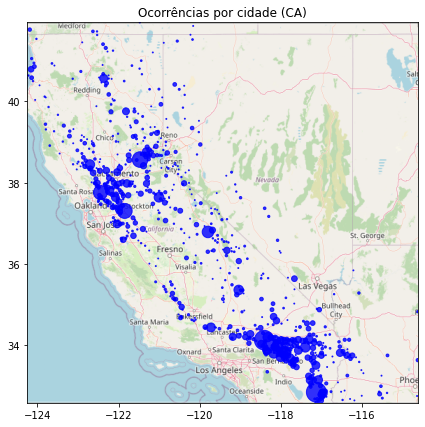

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))

ax.scatter(cities_merge.lng,cities_merge.lat, zorder=0.5, alpha= 0.8, c='b', s=cities_merge.Count)

ax.set_title('Ocorrências por cidade (CA)')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')